<a href="https://colab.research.google.com/github/Cookies2006/Retail-Price-Optimization/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/retail_price.csv')  # Update path after uploading
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [2]:
df.info()         # Check data types and null values
df.describe()     # Statistical overview
df.isnull().sum() # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [3]:
df = df.dropna()  # Or use df.fillna(method='ffill') if needed


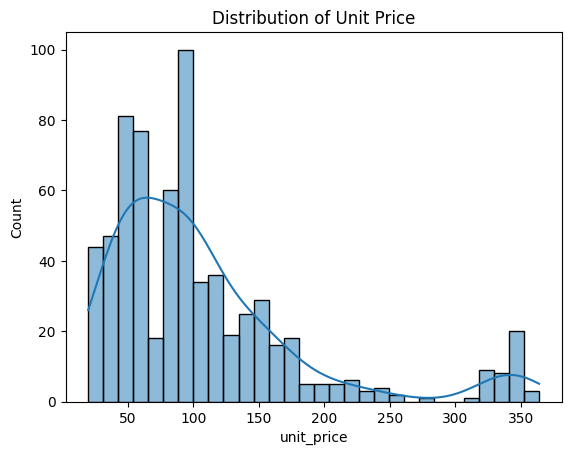

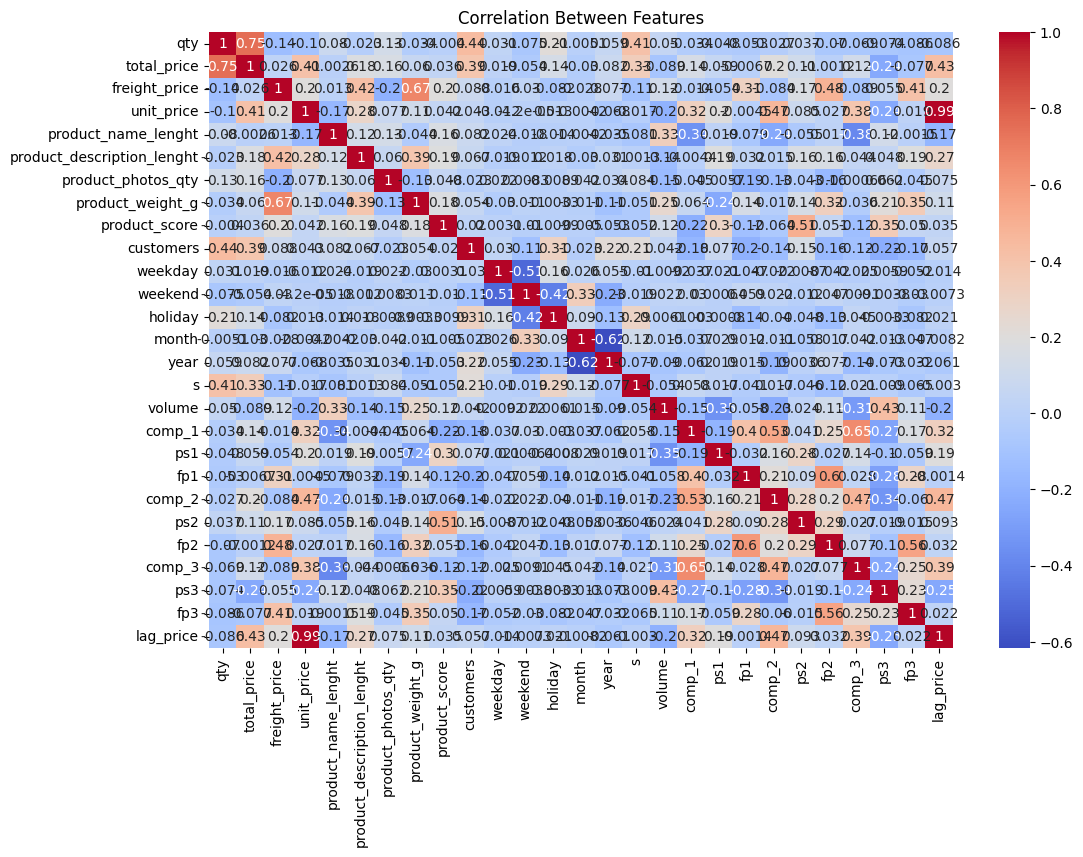

In [5]:
# Distribution of Unit Price
sns.histplot(df['unit_price'], bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Choose relevant features
features = ['qty', 'freight_price', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'comp_1', 'fp1', 'comp_2', 'fp2', 'comp_3', 'fp3', 'lag_price']
X = df[features]
y = df['unit_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9915836973044284
RMSE: 6.742947577849851


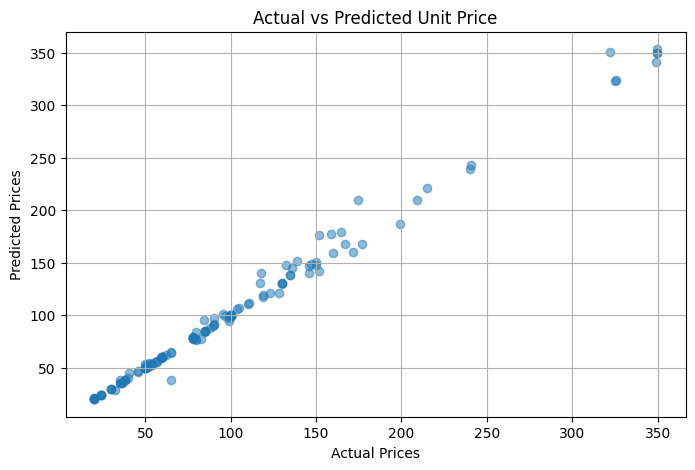

In [8]:
# Compare actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Unit Price")
plt.grid()
plt.show()


In [9]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result.to_csv('predicted_prices.csv', index=False)
